<a href="https://colab.research.google.com/github/nvhieu0163/ComparativeOpinionMining_KLTN2023/blob/main/1_CSI_using_different_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import thư viện

In [ ]:
!pip install py_vncorenlp
!pip install transformers
!pip install tokenizers

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 10.2 MB/s eta 0:00:00
  Created wheel for py_vncorenlp: filename=py_vncorenlp-0.1.4-py3-none-any.whl size=4306 sha256=ba78a1f6f4ab19e89479e8dca8f8a481afbb389fe003ba322c7ec6f95b4eb184
  Stored in directory: /root/.cache/pip/wheels/d5/d9/bf/62632cdb007c702a0664091e92a0bb1f18a2fcecbe962d9827
Successfully built py_vncorenlp


In [ ]:
import pandas as pd
import numpy as np
import json
import sys

## Load dữ liệu

In [ ]:
import py_vncorenlp

rdrsegmenter = py_vncorenlp.VnCoreNLP(annotators=["wseg"], save_dir='/content/drive/MyDrive/NCKH_KLTN/Thuc_nghiem/vn_corenlp_2')

In [ ]:
cd "/content/drive/MyDrive/NCKH_KLTN/Vietnamese Car Reviews Dataset/Unlabeled_Data/CSI_phase/Final"

/content/drive/MyDrive/NCKH_KLTN/Vietnamese Car Reviews Dataset/Unlabeled_Data/CSI_phase/Final


In [ ]:
df125 = pd.read_csv("file125_last_update.csv")
df34 = pd.read_csv("file34_last_update.csv")

In [ ]:
df_total =  pd.concat([df125, df34], ignore_index =  True)
df_total

,blog_idx,stc_idx,main,CSI
0,220,50,"Đặc biệt, dải đèn LED định vị ban ngày của chi...",0
1,220,51,"Tuy nhiên, nhược điểm của cụm đèn này là dễ bá...",0
2,220,52,"Bên phía đối diện, Kia Sorento 2021 cũng mang ...",4
3,220,53,Cụm đèn pha trên chiếc xe do Thaco lắp ráp dùn...,0
4,220,54,"Nhìn vào những thông số kích thước trên, VinFa...",1
...,...,...,...,...
9995,275,29695,Động cơ QX60 được kết hợp với hộp số vô cấp tự...,0
9996,275,29696,"Cũng tương tự Nissan Murano và Pathfinder, độn...",2
9997,275,29697,mẫu SUV hạng sang này được chia thành 3 phiên ...,0
9998,275,29698,"Phiên bản động cơ Prestige S Line 3.0T V6 3,0 ...",0


## Binary Classifier

### Convert to Binary

In [ ]:
# 2 labels
df_total.loc[df_total["CSI"] == 2, "CSI"] = 1   # Comparative sentence là 1, non-comparative sentence là 0
df_total.loc[df_total["CSI"] == 3, "CSI"] = 1
df_total.loc[df_total["CSI"] == 4, "CSI"] = 1

<Axes: >

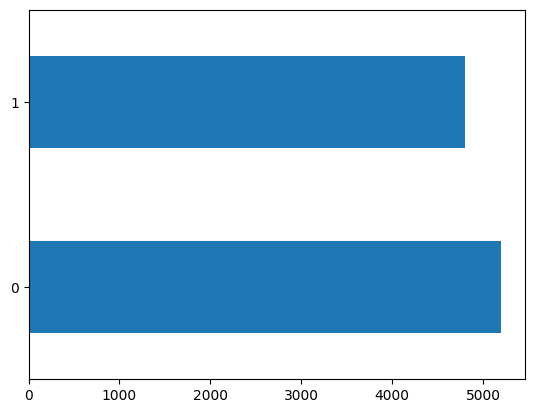

In [ ]:
df_total["CSI"].value_counts().plot.barh()

In [ ]:
token_main = []
for stc in df_total["main"]:
    a = rdrsegmenter.word_segment(stc)
    assert len(a) == 1, 'Độ dài câu văn khác 1'
    token_main.append(a[0])

In [ ]:
df_total["main_token"] = token_main
df_total.head(10)

,blog_idx,stc_idx,main,CSI,main_token
0,220,50,"Đặc biệt, dải đèn LED định vị ban ngày của chi...",0,"Đặc_biệt , dải đèn LED định_vị ban_ngày của ch..."
1,220,51,"Tuy nhiên, nhược điểm của cụm đèn này là dễ bá...",0,"Tuy_nhiên , nhược_điểm của cụm đèn này là dễ b..."
2,220,52,"Bên phía đối diện, Kia Sorento 2021 cũng mang ...",1,"Bên phía đối_diện , Kia_Sorento 2021 cũng mang..."
3,220,53,Cụm đèn pha trên chiếc xe do Thaco lắp ráp dùn...,0,Cụm đèn_pha trên chiếc xe do Thaco lắp_ráp dùn...
4,220,54,"Nhìn vào những thông số kích thước trên, VinFa...",1,"Nhìn vào những thông_số kích_thước trên , VinF..."
5,220,55,"Ở phiên bản cao cấp nhất, VinFast Lux SA2.0 20...",0,"Ở phiên_bản cao_cấp nhất , VinFast_Lux_SA 2.0 ..."
6,220,56,Gương chiếu hậu của xe đồng màu với ngoại thất...,0,Gương chiếu hậu của xe đồng màu với ngoại_thất...
7,220,57,"Bên phía đối diện, Kia Sorento 2021 mới có bộ ...",1,"Bên phía đối_diện , Kia_Sorento 2021 mới có bộ..."
8,220,58,Hãng xe Hàn Quốc gia tăng sự tiện nghi cho ngư...,0,Hãng xe Hàn_Quốc gia_tăng sự tiện_nghi cho ngư...
9,220,59,Dáng vẻ bệ vệ được thể hiện rõ ở phía sau đuôi...,1,Dáng_vẻ bệ_vệ được thể_hiện rõ ở phía sau đuôi...


### Using SVM - TFTDF

In [ ]:
# from pyvi import ViTokenizer, ViPosTagger
import numpy as np
import pandas as pd
import gensim
import sklearn
import tensorflow as tf
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.layers import *
from keras.layers import *
from keras.preprocessing.text import Tokenizer

from keras.metrics import sparse_categorical_accuracy
from tensorflow.keras.optimizers import Adam


# from keras.preprocessing.sequence import pad_sequences

from keras.preprocessing import sequence
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from keras.utils import to_categorical

In [ ]:
def tfidf(data, ngram_ranges : range):
    tfidf_vect_ngram = TfidfVectorizer(analyzer='word', max_features=30000, ngram_range=ngram_ranges)
    tfidf_vect_ngram.fit(data)
    return tfidf_vect_ngram.transform(data)
    # return X_data_tfidf_ngram

X_data_tfidf_1gram = tfidf(df_total.main_token, (1, 1))
X_data_tfidf_2gram = tfidf(df_total.main_token, (1, 2))
X_data_tfidf_3gram = tfidf(df_total.main_token, (1, 3))

In [ ]:
X_train_1gram, X_test_1gram, Y_train, Y_test = train_test_split(X_data_tfidf_1gram, df_total.CSI, test_size=0.2, random_state=42)
X_train_2gram, X_test_2gram, Y_train, Y_test = train_test_split(X_data_tfidf_2gram, df_total.CSI, test_size=0.2, random_state=42)
X_train_3gram, X_test_3gram, Y_train, Y_test = train_test_split(X_data_tfidf_3gram, df_total.CSI, test_size=0.2, random_state=42)

In [ ]:
def trainning_CSI_SVM(X_train, Y_train):
    model = svm.SVC(kernel='linear', C=1000)
    model.fit(X_train, Y_train)
    return model

def testing_CSI_SVM(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_pred, y_test, digits=4))

In [ ]:
svm_1gram_model = trainning_CSI_SVM(X_train_1gram, Y_train)
testing_CSI_SVM(svm_1gram_model, X_test_1gram, Y_test)

              precision    recall  f1-score   support

           0     0.7880    0.7701    0.7789      1057
           1     0.7487    0.7678    0.7581       943

    accuracy                         0.7690      2000
   macro avg     0.7684    0.7689    0.7685      2000
weighted avg     0.7695    0.7690    0.7691      2000



In [ ]:
svm_2gram_model = trainning_CSI_SVM(X_train_2gram, Y_train)
testing_CSI_SVM(svm_2gram_model, X_test_2gram, Y_test)

              precision    recall  f1-score   support

           0     0.8722    0.8274    0.8492      1089
           1     0.8056    0.8551    0.8296       911

    accuracy                         0.8400      2000
   macro avg     0.8389    0.8412    0.8394      2000
weighted avg     0.8419    0.8400    0.8403      2000



In [ ]:
svm_3gram_model = trainning_CSI_SVM(X_train_3gram, Y_train)
testing_CSI_SVM(svm_3gram_model, X_test_3gram, Y_test)

              precision    recall  f1-score   support

           0     0.8683    0.8140    0.8403      1102
           1     0.7880    0.8486    0.8172       898

    accuracy                         0.8295      2000
   macro avg     0.8282    0.8313    0.8287      2000
weighted avg     0.8323    0.8295    0.8299      2000



### Using LGBM + Chi-square

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

In [ ]:
def get_Chi2_score(X_train, Y_train):
    bin_cv = CountVectorizer(analyzer="word", tokenizer=None, preprocessor=None, stop_words=None, binary=True)
    le = LabelEncoder()
    X = bin_cv.fit_transform(X_train, np.nan)
    y = le.fit_transform(Y_train).reshape(-1, 1)

    skb = SelectKBest(chi2, k='all')
    skb.fit(X, y)

    feature_ids = skb.get_support(indices=True)
    feature_names = bin_cv.get_feature_names_out()
    result = {}
    vocab = []

    for new_fid, old_fid in enumerate(feature_ids):
        feature_name = feature_names[old_fid]
        vocab.append(feature_name)

    result['word'] = vocab
    result['_score'] = list(skb.scores_)
    result['_pvalue'] = list(skb.pvalues_)

    result_df = pd.DataFrame.from_dict(result)
    result_df = result_df.sort_values('_score', ascending=False).reset_index()
    # result_df.to_csv('./chi2/CSI_Chi2_file125.csv')
    return result_df

In [ ]:
def get_presented_Chi2_features(X, Chi2_score_df, k_best : int):
    # Lấy k từ đầu tiên trong vocab chi2
    vocab_k_best = list(Chi2_score_df['word'].head(k_best))

    # represent chi2
    chi2_features = []
    for stc in X:
        feature = [1 if word in stc.split(' ') else 0 for word in vocab_k_best]
        chi2_features.append(feature)

    return chi2_features

In [ ]:
from lightgbm import LGBMClassifier

def trainning_CSI_LGBM(X_train, Y_train):
    model = LGBMClassifier()
    model.fit(X_train, Y_train)
    return model

def testing_CSI_LGBM(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_pred, y_test, digits=4))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_total.main_token, df_total.CSI, test_size=0.2, random_state=42)

# get chi2 score dict
chi2_score_df = get_Chi2_score(X_train, y_train)

In [ ]:
for k_best in range(500, len(chi2_score_df.index), 500):
    # get feature with turning k
    X_train_feature = get_presented_Chi2_features(X_train, chi2_score_df, k_best)
    X_test_feature = get_presented_Chi2_features(X_test, chi2_score_df, k_best)

    # trainning model
    lgbm_model = trainning_CSI_LGBM(X_train_feature, y_train)

    # testing model
    print(f'========================= K = {k_best} =========================')
    testing_CSI_LGBM(lgbm_model, X_test_feature, y_test)

[LightGBM] [Info] Number of positive: 3836, number of negative: 4164
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017243 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 622
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 311
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.479500 -> initscore=-0.082046
[LightGBM] [Info] Start training from score -0.082046
========================= K = 500 =========================
              precision    recall  f1-score   support

           0     0.8645    0.8322    0.8481      1073
           1     0.8139    0.8490    0.8310       927

    accuracy                         0.8400      2000
   macro avg     0.8392    0.8406    0.8395      2000
weighted avg     0.8410    0.8400    0.8402      2000

[LightGBM] [Info] Number of positive: 3836, number of nega

## Multi-lable Classifier


In [ ]:
# Load data again
df125 = pd.read_csv("file125_last_update.csv")
df34 = pd.read_csv("file34_last_update.csv")
df_total =  pd.concat([df125, df34], ignore_index =  True)

# 3 labels
df_total.loc[df_total["CSI"] == 1, "CSI"] = 2       # gradable comparative là 2
df_total.loc[df_total["CSI"] == 3, "CSI"] = 2       # non comparative là 0
df_total.loc[df_total["CSI"] == 4, "CSI"] = 1       # non gradable comparative là 1

<Axes: >

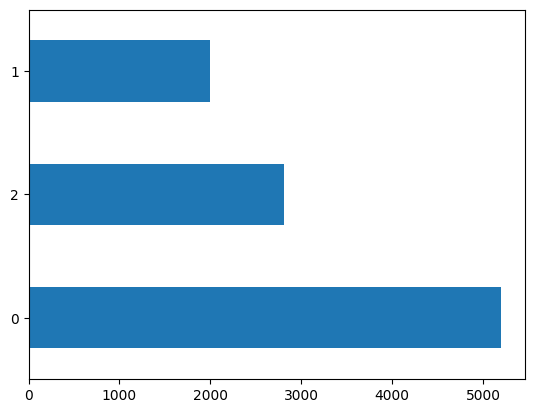

In [ ]:
df_total.CSI.value_counts().plot.barh()

### Using SVM + TFIDF

In [ ]:
X_train_1gram, X_test_1gram, Y_train, Y_test = train_test_split(X_data_tfidf_1gram, df_total.CSI, test_size=0.2, random_state=42)
X_train_2gram, X_test_2gram, Y_train, Y_test = train_test_split(X_data_tfidf_2gram, df_total.CSI, test_size=0.2, random_state=42)
X_train_3gram, X_test_3gram, Y_train, Y_test = train_test_split(X_data_tfidf_3gram, df_total.CSI, test_size=0.2, random_state=42)

In [ ]:
svm_1gram_model = trainning_CSI_SVM(X_train_1gram, Y_train)
testing_CSI_SVM(svm_1gram_model, X_test_1gram, Y_test)

              precision    recall  f1-score   support

           0     0.8412    0.7616    0.7994      1141
           1     0.5421    0.5722    0.5568       360
           2     0.6201    0.7295    0.6703       499

    accuracy                         0.7195      2000
   macro avg     0.6678    0.6878    0.6755      2000
weighted avg     0.7322    0.7195    0.7236      2000



In [ ]:
svm_2gram_model = trainning_CSI_SVM(X_train_2gram, Y_train)
testing_CSI_SVM(svm_2gram_model, X_test_2gram, Y_test)

              precision    recall  f1-score   support

           0     0.8984    0.8056    0.8494      1152
           1     0.6053    0.6785    0.6398       339
           2     0.6934    0.7996    0.7427       509

    accuracy                         0.7825      2000
   macro avg     0.7323    0.7612    0.7440      2000
weighted avg     0.7965    0.7825    0.7867      2000



In [ ]:
svm_3gram_model = trainning_CSI_SVM(X_train_3gram, Y_train)
testing_CSI_SVM(svm_3gram_model, X_test_3gram, Y_test)

              precision    recall  f1-score   support

           0     0.8925    0.8038    0.8459      1147
           1     0.6184    0.6772    0.6465       347
           2     0.6865    0.7964    0.7374       506

    accuracy                         0.7800      2000
   macro avg     0.7325    0.7592    0.7433      2000
weighted avg     0.7929    0.7800    0.7838      2000



### Using LGBM + ChiSquare

In [ ]:
token_main = []
for stc in df_total["main"]:
    a = rdrsegmenter.word_segment(stc)
    assert len(a) == 1, 'Độ dài câu văn khác 1'
    token_main.append(a[0])
df_total["main_token"] = token_main

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_total.main_token, df_total.CSI, test_size=0.2, random_state=42)

# get chi2 score dict
chi2_score_df = get_Chi2_score(X_train, y_train)

In [ ]:
chi2_score_df

,index,word,_score,_pvalue
0,2401,hơn,1268.827653,3.003143e-276
1,5699,đều,996.407310,4.294394e-217
2,4075,so,920.775197,1.138168e-200
3,1646,cả,675.168129,2.449648e-147
4,5738,đối_thủ,567.653228,5.440863e-124
...,...,...,...,...
5856,5808,đức,0.031155,9.845430e-01
5857,4078,so_kè,0.026752,9.867130e-01
5858,1897,dịch_vụ,0.019805,9.901463e-01
5859,2144,gt,0.011282,9.943747e-01


In [ ]:
for k_best in range(500, len(chi2_score_df.index), 500):
    # get feature with turning k
    X_train_feature = get_presented_Chi2_features(X_train, chi2_score_df, k_best)
    X_test_feature = get_presented_Chi2_features(X_test, chi2_score_df, k_best)

    # trainning model
    lgbm_model = trainning_CSI_LGBM(X_train_feature, y_train)

    # testing model
    print(f'========================= K = {k_best} =========================')
    testing_CSI_LGBM(lgbm_model, X_test_feature, y_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021004 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 680
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 340
[LightGBM] [Info] Start training from score -0.652965
[LightGBM] [Info] Start training from score -1.598869
[LightGBM] [Info] Start training from score -1.282385
========================= K = 500 =========================
              precision    recall  f1-score   support

           0     0.8809    0.8147    0.8465      1117
           1     0.6026    0.6856    0.6415       334
           2     0.7325    0.7832    0.7570       549

    accuracy                         0.7845      2000
   macro avg     0.7387    0.7612    0.7483      2000
weighted avg     0.7937    0.7845    0.7877      2000

[LightGBM] [Info] Auto-choosing row-wise mult